c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

排序后的数据评估结果（type=5分类）：
             layers activation solver  F1-avg  F1-std  Acc-avg  Acc-std
19  (50, 25, 12, 6)       relu   adam  0.3726  0.0230   0.3295   0.0341
4      (50, 25, 12)       tanh  lbfgs  0.2199  0.1576   0.7670   0.0406
17     (50, 25, 12)       tanh  lbfgs  0.2199  0.1576   0.7670   0.0406
9   (50, 25, 12, 6)       relu  lbfgs  0.1788  0.0520   0.6477   0.0997
13     (50, 50, 25)       relu   adam  0.1615  0.1616   0.7045   0.1213
15        (100, 50)       tanh   adam  0.1043  0.1060   0.7330   0.0436
11         (64, 32)       tanh  lbfgs  0.1033  0.1367   0.6648   0.1228
0      (50, 25, 12)       relu   adam  0.0947  0.0991   0.6136   0.1078
18     (50, 25, 12)       relu   adam  0.0947  0.0991   0.6136   0.1078
3      (50, 25, 12)       relu  lbfgs  0.0000  0.0000   0.7955   0.0000


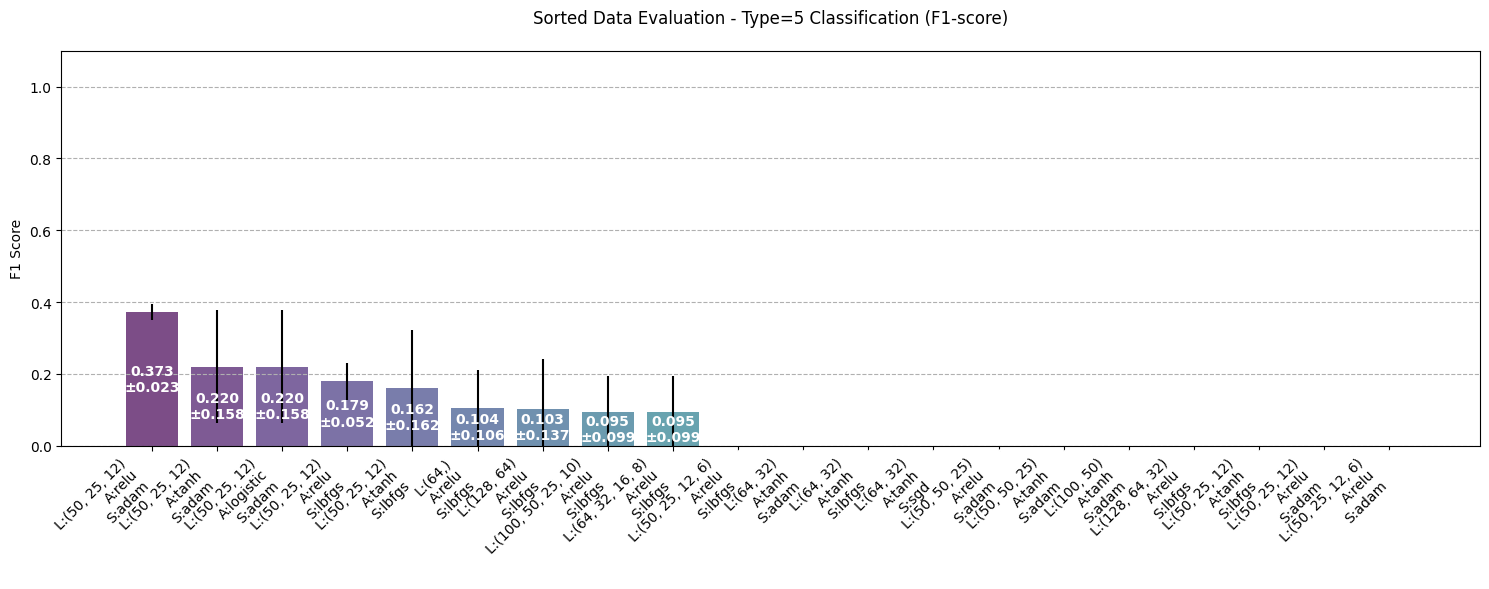

In [ ]:
import pandas as pd
import numpy as np
import os  # 新增导入os模块
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
# ========== 1. 数据排序（保持原始逻辑） ==========
# 读取原始数据
df = pd.read_excel("Data_Set_(A+B).xlsx")

# 按目标变量排序
df_sorted = df.sort_values(by="Type", ascending=False)

# 保存排序结果到当前目录（修改点）
df_sorted.to_csv("sorted_data.csv", index=False)  # 直接保存到当前目录

# 重新加载排序后的数据（路径修改）
df_sorted = pd.read_csv("sorted_data.csv")  # 从当前目录读取

# ========== 2. 数据准备 ==========
# 特征/目标分离
X = df_sorted.drop(columns=["Type"])
y = (df_sorted["Type"] == 5).astype(int)

# 删除原目录创建代码（不再需要）
# os.makedirs('../data', exist_ok=True)  # 这行已移除


# # 保持原始归一化选项
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# ========== 3. 模型配置（保持原始结构） ==========
config_list = [
    # 原始配置组
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "logistic", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    
    # 扩展结构组
    {"layers": (64,), "activation": "relu", "solver": "lbfgs"},
    {"layers": (128, 64), "activation": "relu", "solver": "lbfgs"},
    {"layers": (100, 50, 25, 10), "activation": "relu", "solver": "lbfgs"},
    {"layers": (64, 32, 16, 8), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12, 6), "activation": "relu", "solver": "lbfgs"},
    
    # 混合配置组
    {"layers": (64, 32), "activation": "tanh", "solver": "adam"},
    {"layers": (64, 32), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (64, 32), "activation": "tanh", "solver": "sgd"},
    
    {"layers": (50, 50,25), "activation": "relu", "solver": "adam"},
    {"layers": (50, 50,25), "activation": "tanh", "solver": "adam"},
    {"layers": (100, 50), "activation": "tanh", "solver": "adam"},
    {"layers": (128, 64, 32), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12,6), "activation": "relu", "solver": "adam"},
]

# ========== 4. 评估流程（保持原始逻辑） ==========
results = []
for config in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=config["layers"],
        activation=config["activation"],
        solver=config["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(
        model, X, y,
        cv=4,
        scoring={"f1": "f1", "accuracy": "accuracy"}
    )
    
    results.append({
        "layers": config["layers"],
        "activation": config["activation"],
        "solver": config["solver"],
        "F1-avg": round(scores["test_f1"].mean(), 4),
        "F1-std": round(scores["test_f1"].std(), 4),
        "Acc-avg": round(scores["test_accuracy"].mean(), 4),
        "Acc-std": round(scores["test_accuracy"].std(), 4)
    })

# ========== 5. 结果展示（优化可视化） ==========
# 表格输出
result_df = pd.DataFrame(results).sort_values(by="F1-avg", ascending=False)
print("排序后的数据评估结果(type=5分类):")
print(result_df.head(10))

# 可视化改进
plt.figure(figsize=(15, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(result_df)))

# 带误差线的条形图
bars = plt.bar(
    range(len(result_df)),
    result_df["F1-avg"],
    yerr=result_df["F1-std"],
    color=colors,
    alpha=0.7
)

# 添加数据标签
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height/2, 
        f"{height:.3f}\n±{result_df.iloc[idx]['F1-std']:.3f}",
        ha='center', 
        va='center',
        color='white',
        fontweight='bold'
    )

plt.title("Sorted Data Evaluation - Type=5 Classification (F1-score)", pad=20)
plt.ylabel("F1 Score")
plt.xticks(
    range(len(result_df)),
    [f"L:{c['layers']}\nA:{c['activation']}\nS:{c['solver']}" for c in config_list],
    rotation=45,
    ha='right'
)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

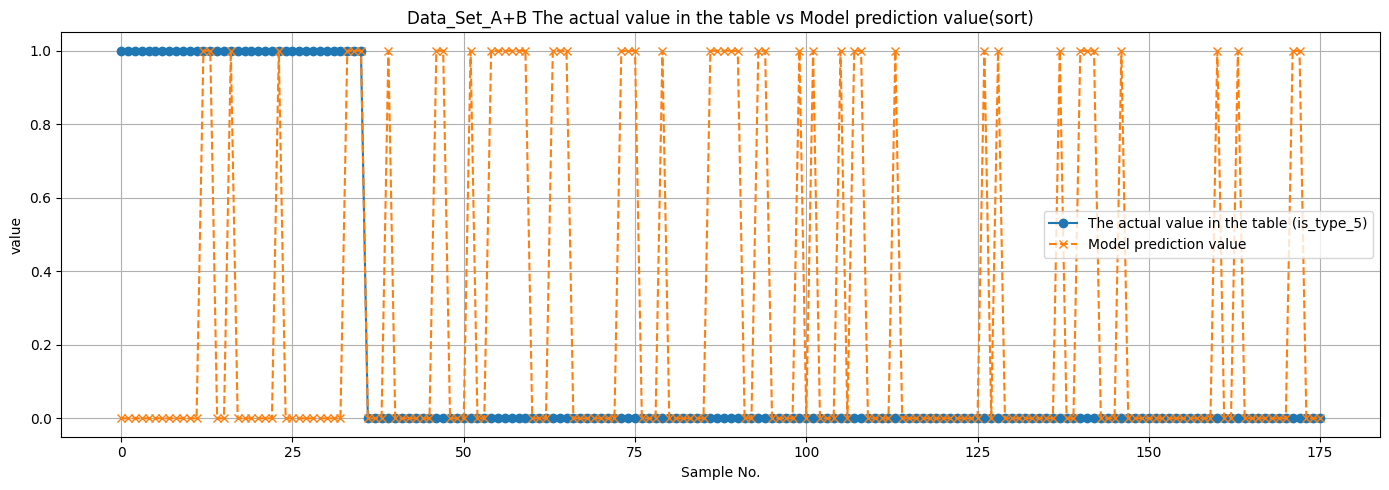

In [2]:
model.fit(X, y)
y_pred = model.predict(X)

N = len(y)

# 创建比较图
plt.figure(figsize=(14, 5))
plt.plot(np.arange(N), y[:N], label='The actual value in the table (is_type_5)', marker='o')
plt.plot(np.arange(N), y_pred[:N], label='Model prediction value', marker='x', linestyle='--')
plt.title('Data_Set_A+B The actual value in the table vs Model prediction value(sort)')
plt.xlabel('Sample No.')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()